# Using VGG16 for Object Detection in Image

In [21]:
import numpy as np
import keras
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import cv2
import matplotlib.pyplot as plt

In [3]:
model = VGG16(weights="imagenet",include_top=True)

553467096/553467096 [==============================] - 17s 0us/step


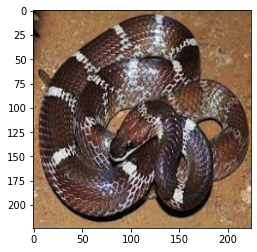

(224, 224, 3)


In [18]:
image = cv2.imread('la_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(224,224))
plt.imshow(image)
plt.show()
print(image.shape)

In [19]:
image = np.expand_dims(image,axis=0)
print(image.shape)
image = preprocess_input(image)
print(image.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [20]:
predictions = model.predict(image)

1/1 [==============================] - 1s 597ms/step


In [34]:
top_predictions = decode_predictions(predictions,top=5)[0] # Decode Top 5 predictions
top_predictions_array = np.array(top_predictions)
top_class_id = np.argmax(top_predictions_array[:,2])
print(top_class_id)
for prediction in top_predictions:
  print(prediction)

print(f"Result is {top_predictions[top_class_id][1]}")

0
('n01734418', 'king_snake', 0.22464576)
('n01740131', 'night_snake', 0.20929645)
('n01729322', 'hognose_snake', 0.15084377)
('n01728920', 'ringneck_snake', 0.087055914)
('n01756291', 'sidewinder', 0.085446544)
Result is king_snake
